In [21]:
from dataloader import *
from model import *
from train_eval_test import *
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import pandas as pd
import csv

from torch.utils.data import Subset, DataLoader

In [22]:
torch.manual_seed(0)


In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
data = pd.read_csv(f'data/solar.csv', header=None).to_numpy()
train_loader, eval_loader, test_loader = get_loaders(data, 32, 36601, 5161, 10417, T=96, S=96)
N= 137
D = 512
s = 96
hidden_dim = 512
nb_blocks = 2
itransformer = iTransformer(N, 96, D, s, hidden_dim, nb_blocks, typeTrmBlock="inverted").to(device)
optimizer = torch.optim.Adam(itransformer.parameters(), lr=1e-4, weight_decay=1e-5)


cuda


In [24]:
mse, mae = train(itransformer, optimizer, train_loader, eval_loader, 10, device)

loss_mse, lossmae, _, _ = test(itransformer, test_loader, device)

---- epoch :  0
loss train : 0.34459775524323283
loss eval : 0.18396829504449413
---- epoch :  1
loss train : 0.311587058014247
loss eval : 0.18485505063578767
---- epoch :  2
loss train : 0.3014333092466349
loss eval : 0.16531685678838934
---- epoch :  3
loss train : 0.2945302447710614
loss eval : 0.1679375411110854
---- epoch :  4
loss train : 0.2893699991086614
loss eval : 0.16392784237674196
---- epoch :  5
loss train : 0.28635320972445555
loss eval : 0.16496808522339887
---- epoch :  6
loss train : 0.2826185275675642
loss eval : 0.17534469241428674
---- epoch :  7
loss train : 0.279434444844775
loss eval : 0.1582767884217718
---- epoch :  8
loss train : 0.2758065543082803
loss eval : 0.16112398937250832
---- epoch :  9
loss train : 0.2728167869196348
loss eval : 0.15894376261616652


In [25]:
A = itransformer.liste_attention



In [26]:
A

[]

In [34]:
itransformer.liste_attention = []
for x,y in test_loader :
    x = x.float().to(device)
    itransformer(x, True)
    break

In [35]:
for x,y in test_loader :
    print(x.shape)
    break

torch.Size([32, 96, 137])


In [36]:
A1 = itransformer.liste_attention[0]
A2 = itransformer.liste_attention[1]

In [45]:
i = 24

H :  0


/tmp/ipykernel_14743/703630759.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


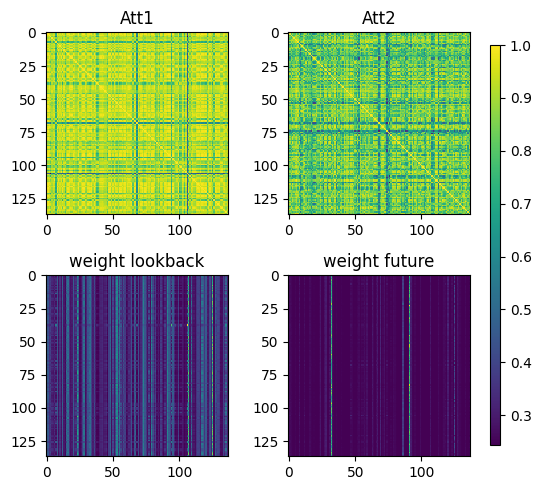

H :  1


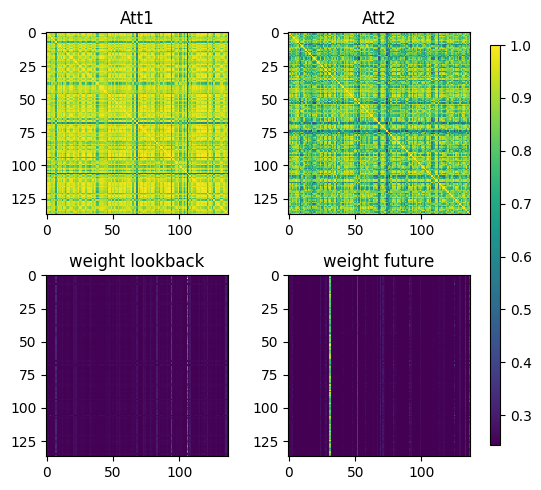

H :  2


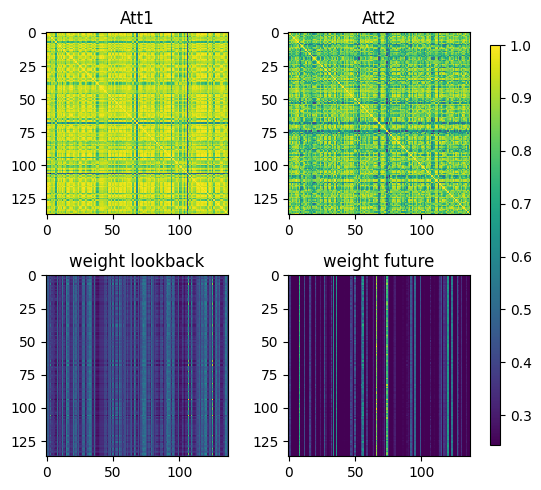

H :  3


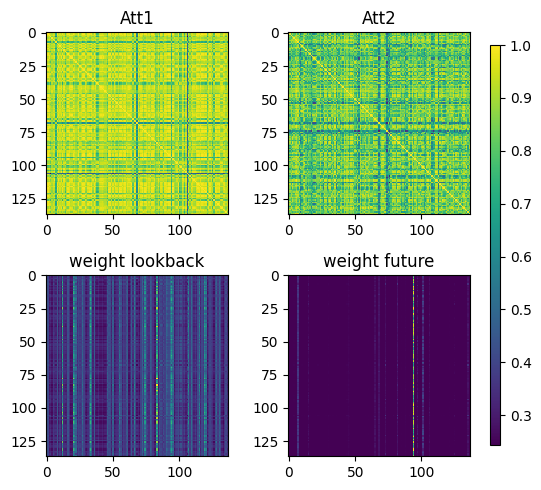

H :  4


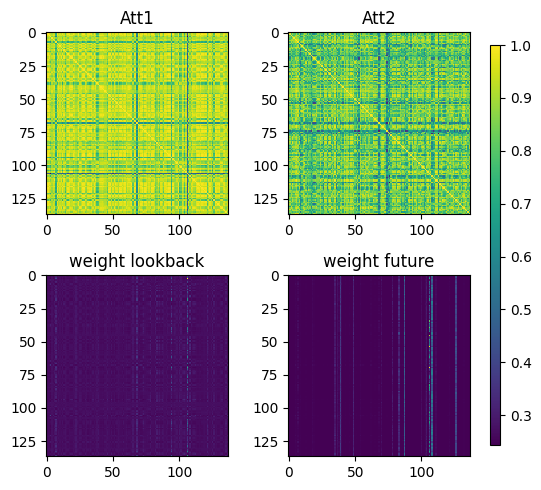

H :  5


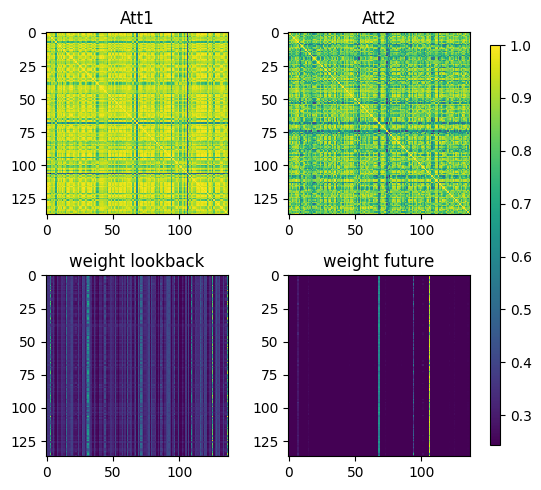

H :  6


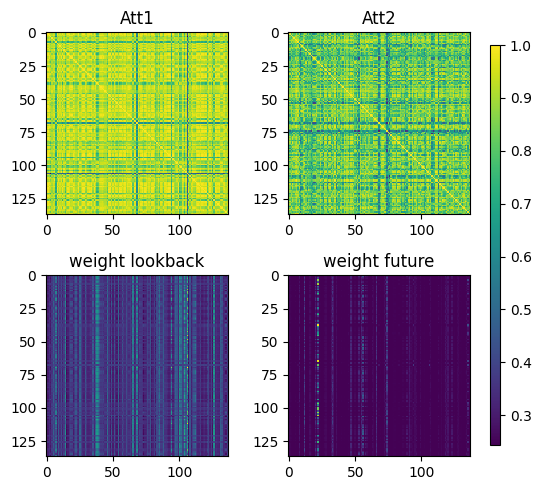

H :  7


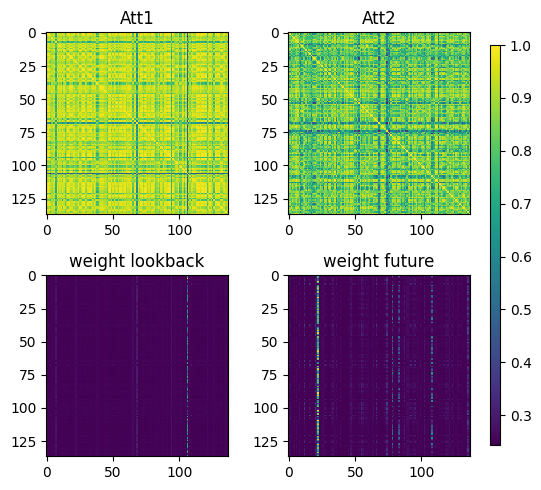

In [46]:
c_lookback = x[i,:,:].T
corr_lookback = np.corrcoef(c_lookback)
c_lookforward = y[i,:,:].T
corr_lookforward = np.corrcoef(c_lookforward)

for h in range(8): 
    print("H : ",h)
    Att1 = A1[:, h, :, :]
    Att2 = A2[:, h, :, :]
    
    fig = plt.figure(figsize=(5, 5))

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    im1 = ax1.imshow(corr_lookback, cmap='viridis', interpolation='nearest')
    ax1.set_title('Att1')

    ax2 = plt.subplot2grid((2, 2), (0, 1))
    im2 = ax2.imshow(corr_lookforward, cmap='viridis', interpolation='nearest')
    ax2.set_title('Att2')
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    
    im3 = ax3.imshow(Att1[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
    ax3.set_title('weight lookback')

    ax4 = plt.subplot2grid((2, 2), (1, 1))
    im4 = ax4.imshow(Att2[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
    ax4.set_title('weight future')
    
    # Ajouter une colorbar commune à droite du graphique
    cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
    fig.colorbar(im1, cax=cbar_ax)

    # Ajuster l'espacement entre les subplots
    plt.tight_layout()

    # Afficher le graphique
    plt.show()


/tmp/ipykernel_14743/3770765249.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


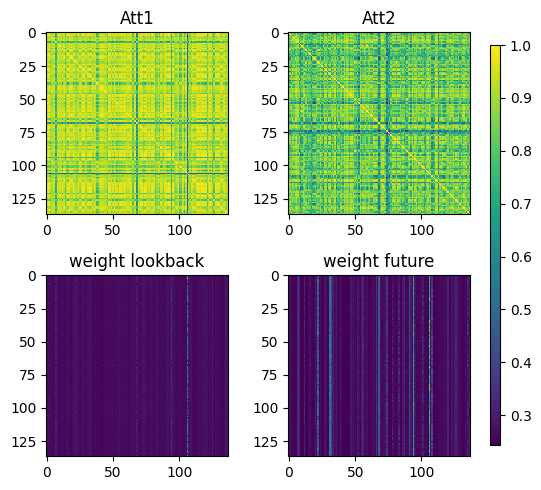

In [47]:
Att1_moy = A1.mean(dim=1)
Att2_moy = A2.mean(dim=1)

# Images du haut
fig = plt.figure(figsize=(5, 5))

ax1 = plt.subplot2grid((2, 2), (0, 0))
im1 = ax1.imshow(corr_lookback, cmap='viridis', interpolation='nearest')
ax1.set_title('Att1')

ax2 = plt.subplot2grid((2, 2), (0, 1))
im2 = ax2.imshow(corr_lookforward, cmap='viridis', interpolation='nearest')
ax2.set_title('Att2')

# Images du bas
ax3 = plt.subplot2grid((2, 2), (1, 0))
im3 = ax3.imshow(Att1_moy[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
ax3.set_title('weight lookback')

ax4 = plt.subplot2grid((2, 2), (1, 1))
im4 = ax4.imshow(Att2_moy[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
ax4.set_title('weight future')

# Ajouter une colorbar commune à droite du graphique
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(im1, cax=cbar_ax)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()


/tmp/ipykernel_14743/1850879589.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


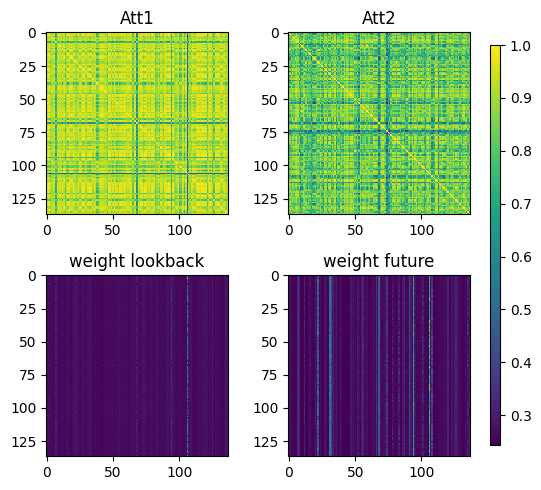

In [48]:
Att1_sum = A1.sum(dim=1)
Att2_sum = A2.sum(dim=1)

# Images du haut
fig = plt.figure(figsize=(5, 5))

ax1 = plt.subplot2grid((2, 2), (0, 0))
im1 = ax1.imshow(corr_lookback, cmap='viridis', interpolation='nearest')
ax1.set_title('Att1')

ax2 = plt.subplot2grid((2, 2), (0, 1))
im2 = ax2.imshow(corr_lookforward, cmap='viridis', interpolation='nearest')
ax2.set_title('Att2')

# Images du bas
ax3 = plt.subplot2grid((2, 2), (1, 0))
im3 = ax3.imshow(Att1_sum[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
ax3.set_title('weight lookback')

ax4 = plt.subplot2grid((2, 2), (1, 1))
im4 = ax4.imshow(Att2_sum[i].detach().to('cpu'), cmap='viridis', interpolation='nearest')
ax4.set_title('weight future')

# Ajouter une colorbar commune à droite du graphique
cbar_ax = fig.add_axes([1, 0.1, 0.02, 0.8])
fig.colorbar(im1, cax=cbar_ax)

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()
